In [118]:
# Imports
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Import Transformers library

In [119]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import pandas as pd
import torch
import transformers

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

## Preprocessing csv file to remove EOF string errors

In [122]:
import csv
data = []
err=[]
with open('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        try:
            # Add the row to the data list
            data.append(row)
        except Exception as e:
            err.append(row)
            print(f"Error processing row: {row}")
            print(f"Error message: {e}")
            continue

In [123]:
import csv

with open('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv') as infile, open('output.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    for row in reader:
        if len(row) > 1 and row[1].startswith('"') and not row[1].endswith('"'):
            row[1] += '"'
        writer.writerow(row)

## Read final csv file

In [124]:
df = pd.read_csv('output.csv')
# df = df[0].str.split(',', expand=True)

In [125]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


## chosing relevant features 

In [126]:
#choosing relevant columns
x = df['reviews.text']
y = df['reviews.rating']
data = pd.DataFrame(list(zip(x,y)),columns = ['text','rating'])
data.head()

,text,rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


In [127]:
y.unique()

array([3, 5, 4, 1, 2])

In [128]:
data.shape

(3620, 2)

In [129]:
data.size

7240

In [130]:
#data cleaning


<Axes: xlabel='rating', ylabel='count'>

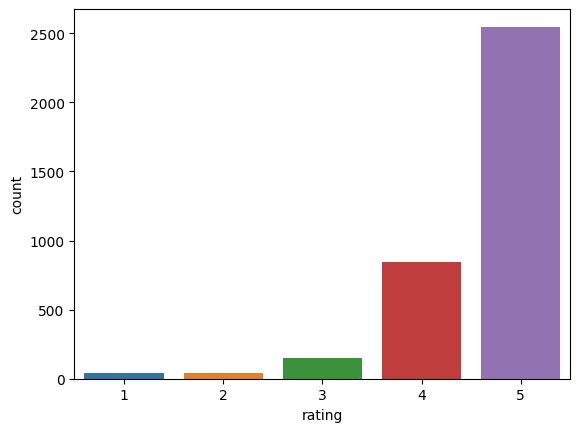

In [131]:
sns.countplot(x=data['rating'])

# Cleaning text data

In [132]:
import nltk
from nltk.corpus import stopwords
import string

In [133]:
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
def cleaned_data(text):
  words = nltk.word_tokenize(text)
  filter1 = [word for word in words if word.lower() not in stopwords]
  filter2 = [word.lower() for word in filter1 
             if word.lower() not in string.punctuation]
  processed_text = ' '.join(filter2)
  return processed_text

In [135]:
data['text_p'] = data['text'].apply(lambda x : cleaned_data(x))

In [136]:
data['text_p'].head()

0    thought would big small paper turn like palm t...
1               kindle light easy use especially beach
2    didnt know much 'd use kindle went lower end i...
3    100 happy purchase caught sale really good pri...
4    solid entry level kindle great kids gifted kid...
Name: text_p, dtype: object

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3620 entries, 0 to 3619
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3620 non-null   object
 1   rating  3620 non-null   int64 
 2   text_p  3620 non-null   object
dtypes: int64(1), object(2)
memory usage: 85.0+ KB


# Split the data

In [138]:
from sklearn.model_selection import train_test_split

In [152]:
y = data['rating']
data['rating']= tf.one_hot(data['rating'],5,)

In [140]:
train, test = train_test_split(data, test_size=0.2,stratify=y, random_state=42)
# train,val = train_test_split(data, test_size=0.2,stratify=y, random_state=42) 

In [141]:
train.head()

,text,rating,text_p
3072,Can charge and take anywhere in the house! Hol...,0.0,charge take anywhere house holds long charge
1359,Great product. Loving alexa! Was so happy with...,0.0,great product loving alexa happy know big part
3431,I was looking for and cost effective solution ...,0.0,looking cost effective solution satisfy childr...
3488,I love my Kindle for reading manga and comics....,0.0,love kindle reading manga comics fact graphics...
752,This is perfect for any home it gives up to da...,0.0,perfect home gives date news set alarms much l...


# Preprocess the text data [using Bert Tokenizer]

In [142]:
from transformers import BertTokenizer, TFBertModel,TFBertForSequenceClassification

In [143]:
# Load pre-trained BERT tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data

In [144]:
# Tokenize the text data
train_encodings = tokenizer(train['text_p'].tolist(), truncation=True, padding=True) # tolist() to convert a pandas series to a list

test_encodings = tokenizer(test['text_p'].tolist(), truncation=True, padding=True)

# Creating Datasets

In [145]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), list(train['rating'])))

test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), list(test['rating'])))

# Load the Bert Pretrained Model

In [146]:
# Load pre-trained BERT model
model = transformers.TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Train the Model 

In [147]:
# set optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [148]:
# Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [155]:
from tensorflow.keras.callbacks import EarlyStopping
# define early stopping
earlystop_callback = EarlyStopping(
    monitor='val_loss',  # quantity to monitor
    min_delta=0.001,  # minimum change to qualify as an improvement
    patience=3,  # number of epochs to wait before stopping
    verbose=1,  # verbosity
    restore_best_weights=True  # restore the best weights
)

In [156]:
# Train model
history = model.fit(
    train_dataset.shuffle(100).batch(4),
    epochs=2,
    batch_size=4,
    validation_data=test_dataset.shuffle(100).batch(4),
    callbacks=[earlystop_callback]
)

Epoch 1/2
724/724 [==============================] - 365s 504ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.7760e-04 - val_accuracy: 1.0000
Epoch 2/2
724/724 [==============================] - 337s 466ms/step - loss: 4.1083e-04 - accuracy: 1.0000 - val_loss: 2.1303e-04 - val_accuracy: 1.0000


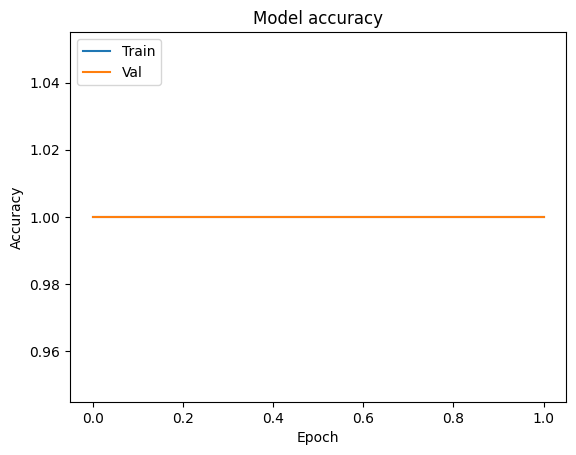

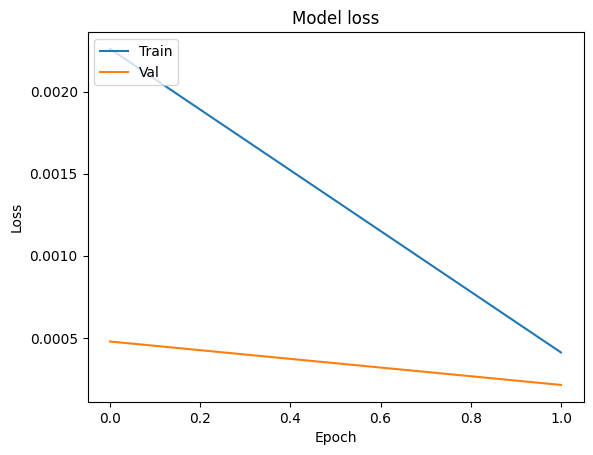

In [157]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [161]:
from sklearn.metrics import classification_report
test_loss, test_accuracy = model.evaluate(test_dataset.batch(16))
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

# Print classification report
y_true = test['rating']
y_pred = np.argmax(model.predict(test_dataset.batch(16)).logits, axis=1)
print(classification_report(y_true, y_pred))

46/46 [==============================] - 28s 613ms/step - loss: 2.1303e-04 - accuracy: 1.0000
Test loss: 0.00021302819368429482, Test accuracy: 1.0
46/46 [==============================] - 28s 609ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       724

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724



In [162]:
# evaluating the model
test_loss, test_acc = model.evaluate(test_dataset.batch(10))
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

73/73 [==============================] - 29s 396ms/step - loss: 2.1303e-04 - accuracy: 1.0000
Test loss: 0.00021302829554770142
Test accuracy: 1.0
